<a href="https://colab.research.google.com/github/alawrence30/Visualization-Challenge-2022/blob/main/Visualization_Challenge_2022_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

os.getcwd()
%cd /content/gdrive/My Drive/Visualization Challenge 2022/
!pwd
!ls

work_dir = "/content/gdrive/My Drive/Visualization Challenge 2022/"

df = pd.read_csv(work_dir + 'Towed_Vehicles.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Visualization Challenge 2022
/content/gdrive/My Drive/Visualization Challenge 2022
 Towed_Vehicles.csv  'Visualization Challenge - FINAL.ipynb'


In [3]:
# View dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tow Date            2709 non-null   object
 1   Make                2685 non-null   object
 2   Style               2694 non-null   object
 3   Model               140 non-null    object
 4   Color               2693 non-null   object
 5   Plate               2287 non-null   object
 6   State               2600 non-null   object
 7   Towed to Address    2709 non-null   object
 8   Tow Facility Phone  2708 non-null   object
 9   Inventory Number    2709 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 211.8+ KB


In [4]:
df.head()

,Tow Date,Make,Style,Model,Color,Plate,State,Towed to Address,Tow Facility Phone,Inventory Number
0,03/11/2022,MITS,LL,NaN,RED,BC96112,IL,400 E. Lower Wacker,(312) 744-7550,254244
1,01/03/2022,VOLV,LL,TK,GRY,RU5898,IL,701 N. Sacramento,(773) 265-7605,7021002
2,03/03/2022,BUIC,LL,NaN,BLK,CC781,IN,701 N. Sacramento,(773) 265-7605,7025888
3,03/12/2022,TOYT,4D,NaN,WHI,858AA010,IL,701 N. Sacramento,(773) 265-7605,7026600
4,03/02/2022,GMC,LL,NaN,WHI,NaN,IL,10300 S. Doty,(773) 568-8495,2929222


In [5]:
# Drop null color values
df = df[df['Color'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 2708
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tow Date            2693 non-null   object
 1   Make                2672 non-null   object
 2   Style               2684 non-null   object
 3   Model               140 non-null    object
 4   Color               2693 non-null   object
 5   Plate               2278 non-null   object
 6   State               2586 non-null   object
 7   Towed to Address    2693 non-null   object
 8   Tow Facility Phone  2692 non-null   object
 9   Inventory Number    2693 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 231.4+ KB


In [6]:
# View color values 
print(df['Color'].value_counts())

BLK    606
GRY    476
WHI    400
SIL    387
BLU    222
RED    183
TAN    110
MAR     76
GRN     62
GLD     36
DBL     33
BGE     32
BRO     18
LBL     13
YEL      7
BRZ      6
ONG      6
PLE      5
LGR      4
CRM      4
TRQ      3
DGR      3
LAV      1
Name: Color, dtype: int64


In [7]:
# Rename color values
df['Color'] = df['Color'].str.replace('BLK','Black')
df['Color'] = df['Color'].str.replace('GRY','Gray')
df['Color'] = df['Color'].str.replace('WHI','White')
df['Color'] = df['Color'].str.replace('SIL','Silver')
df['Color'] = df['Color'].str.replace('BLU','Blue')
df['Color'] = df['Color'].str.replace('RED','Red')
df['Color'] = df['Color'].str.replace('TAN','Tan')
df['Color'] = df['Color'].str.replace('MAR','Maroon')
df['Color'] = df['Color'].str.replace('GRN','Green')
df['Color'] = df['Color'].str.replace('DBL','Dark Blue')
df['Color'] = df['Color'].str.replace('BGE','Beige')
df['Color'] = df['Color'].str.replace('GLD','Gold')
df['Color'] = df['Color'].str.replace('BRO','Brown')
df['Color'] = df['Color'].str.replace('LBL','Light Blue')
df['Color'] = df['Color'].str.replace('BRZ','Bronze')
df['Color'] = df['Color'].str.replace('ONG','Orange')
df['Color'] = df['Color'].str.replace('LGR','Light Green')
df['Color'] = df['Color'].str.replace('YEL','Yellow')
df['Color'] = df['Color'].str.replace('PLE','Purple')
df['Color'] = df['Color'].str.replace('CRM','Cream')
df['Color'] = df['Color'].str.replace('DGR','Dark Green')
df['Color'] = df['Color'].str.replace('TRQ','Turquoise')
df['Color'] = df['Color'].str.replace('LAV','Lavender')

print(df['Color'].value_counts())

Black          606
Gray           476
White          400
Silver         387
Blue           222
Red            183
Tan            110
Maroon          76
Green           62
Gold            36
Dark Blue       33
Beige           32
Brown           18
Light Blue      13
Yellow           7
Bronze           6
Orange           6
Purple           5
Light Green      4
Cream            4
Turquoise        3
Dark Green       3
Lavender         1
Name: Color, dtype: int64


In [9]:
pip install pywaffle

In [10]:
# Install PyWaffle
from pywaffle import Waffle

In [11]:
# Organize color data
df_color = df.groupby('Color').size().reset_index(name = 'counts_color')
n_categories = df_color.shape[0]
colors_color = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

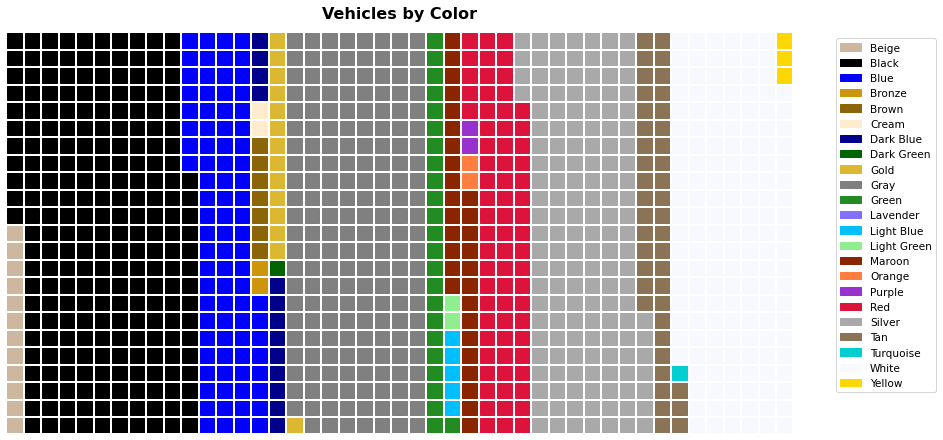

In [42]:
# Plot color data
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        '313': {
            'values': df_color['counts_color'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_color[['Color', 'counts_color']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 10.5},
            'title': {'label': 'Vehicles by Color', 'loc': 'center', 'fontsize':16, 'pad':15, 'fontweight':'bold'},
            'colors':["#CDB79E", "#000000", "#0000FF","#CD950C", "#8B6508", "#FFEBCD",
                     "#00008B", "#006400", "#DCB732","#808080", "#228B22", "#8470FF",
                     "#00BFFF", "#90EE90", "#8B2500","#FF7D40", "#9932CC", "#DC143C",
                     "#A9A9A9", "#8B7355", "#00CED1","#F8F8FF", "#FFD700"],
        }
    },
    rows = 23,
    columns = 45,
    figsize=(13, 18)
)


In [ ]:
a